<a href="https://colab.research.google.com/github/sc-dataman/DL_NNets/blob/master/mar21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

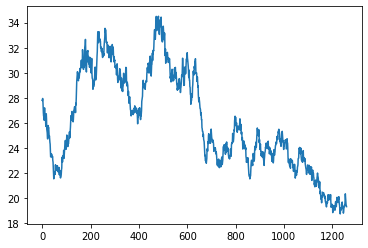

In [1]:
# Now Create data 
from __future__ import division
from random import gauss
from math import exp, sqrt
from matplotlib import pyplot as plt

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

# USER INPUT
S0 = 28.65 # underlying price
v = 0.2076 # vol of 20.76%
mu = 0.02 # mu
dt = 1/252 # 1 day
T = 5 # period end
n = int(T/dt) # number of steps

S_path=[]
S=S0 # starting price
for i in range(1,n+1):
    S_t = generate_asset_price(S,v,mu,dt)
    S= S_t
    S_path.append(S_t)

plt.plot(S_path)


In [2]:
len(S_path)

1260

In [3]:
from dateutil import rrule 
import datetime

# Generate ruleset for holiday observances on the NYSE

def NYSE_holidays(a=datetime.date.today(), b=datetime.date.today()+datetime.timedelta(days=365)):
    rs = rrule.rruleset()

    # Include all potential holiday observances
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=31, byweekday=rrule.FR)) # New Years Day  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, bymonthday= 1))                     # New Years Day  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, bymonthday= 2, byweekday=rrule.MO)) # New Years Day    
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 1, byweekday= rrule.MO(3)))            # Martin Luther King Day   
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 2, byweekday= rrule.MO(3)))            # Washington's Birthday
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, byeaster= -2))                                  # Good Friday
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 5, byweekday= rrule.MO(-1)))           # Memorial Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 3, byweekday=rrule.FR)) # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 4))                     # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 7, bymonthday= 5, byweekday=rrule.MO)) # Independence Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth= 9, byweekday= rrule.MO(1)))            # Labor Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=11, byweekday= rrule.TH(4)))            # Thanksgiving Day
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=24, byweekday=rrule.FR)) # Christmas  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=25))                     # Christmas  
    rs.rrule(rrule.rrule(rrule.YEARLY, dtstart=a, until=b, bymonth=12, bymonthday=26, byweekday=rrule.MO)) # Christmas 
    
    # Exclude potential holidays that fall on weekends
    rs.exrule(rrule.rrule(rrule.WEEKLY, dtstart=a, until=b, byweekday=(rrule.SA,rrule.SU)))

    return rs
    
# Generate ruleset for NYSE trading days

def NYSE_tradingdays(a=datetime.date.today(), b=datetime.date.today()+datetime.timedelta(days=365)):
    rs = rrule.rruleset()
    rs.rrule(rrule.rrule(rrule.DAILY, dtstart=a, until=b))
    
    # Exclude weekends and holidays
    rs.exrule(rrule.rrule(rrule.WEEKLY, dtstart=a, byweekday=(rrule.SA,rrule.SU)))
    rs.exrule(NYSE_holidays(a,b))
    
    return rs

# Examples

# List all NYSE holiday observances for the coming year
print ("NYSE Holidays\n")
for dy in NYSE_holidays():
    print (dy.strftime('%b %d %Y'))
    

dts = []
# Count NYSE trading days in next 5 years

for yr in range(2015,2020):
  for d in list(NYSE_tradingdays(datetime.datetime(yr,1,1),datetime.datetime(yr,12,31))):
    dts.append(d.strftime('%b %d %Y'))

print(dts)

len(dts)


NYSE Holidays

Apr 10 2020
May 25 2020
Jul 03 2020
Sep 07 2020
Nov 26 2020
Dec 25 2020
Jan 01 2021
Jan 18 2021
Feb 15 2021
['Jan 02 2015', 'Jan 05 2015', 'Jan 06 2015', 'Jan 07 2015', 'Jan 08 2015', 'Jan 09 2015', 'Jan 12 2015', 'Jan 13 2015', 'Jan 14 2015', 'Jan 15 2015', 'Jan 16 2015', 'Jan 20 2015', 'Jan 21 2015', 'Jan 22 2015', 'Jan 23 2015', 'Jan 26 2015', 'Jan 27 2015', 'Jan 28 2015', 'Jan 29 2015', 'Jan 30 2015', 'Feb 02 2015', 'Feb 03 2015', 'Feb 04 2015', 'Feb 05 2015', 'Feb 06 2015', 'Feb 09 2015', 'Feb 10 2015', 'Feb 11 2015', 'Feb 12 2015', 'Feb 13 2015', 'Feb 17 2015', 'Feb 18 2015', 'Feb 19 2015', 'Feb 20 2015', 'Feb 23 2015', 'Feb 24 2015', 'Feb 25 2015', 'Feb 26 2015', 'Feb 27 2015', 'Mar 02 2015', 'Mar 03 2015', 'Mar 04 2015', 'Mar 05 2015', 'Mar 06 2015', 'Mar 09 2015', 'Mar 10 2015', 'Mar 11 2015', 'Mar 12 2015', 'Mar 13 2015', 'Mar 16 2015', 'Mar 17 2015', 'Mar 18 2015', 'Mar 19 2015', 'Mar 20 2015', 'Mar 23 2015', 'Mar 24 2015', 'Mar 25 2015', 'Mar 26 2015', 'Mar 2

1259

In [4]:
S_path = S_path[:len(dts)]
import pandas as pd
df = pd.DataFrame(
    {'Date': dts,
     'Close': S_path
    })
df

,Date,Close
0,Jan 02 2015,27.796950
1,Jan 05 2015,27.788652
2,Jan 06 2015,27.951645
3,Jan 07 2015,27.770874
4,Jan 08 2015,27.272274
...,...,...
1254,Dec 24 2019,20.342903
1255,Dec 26 2019,20.049608
1256,Dec 27 2019,19.621766
1257,Dec 30 2019,19.491147


In [5]:
len(S_path)

1259

In [6]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
print(df)

            Date      Close
0     01/02/2015  27.796950
1     01/05/2015  27.788652
2     01/06/2015  27.951645
3     01/07/2015  27.770874
4     01/08/2015  27.272274
...          ...        ...
1254  12/24/2019  20.342903
1255  12/26/2019  20.049608
1256  12/27/2019  19.621766
1257  12/30/2019  19.491147
1258  12/31/2019  19.387500

[1259 rows x 2 columns]


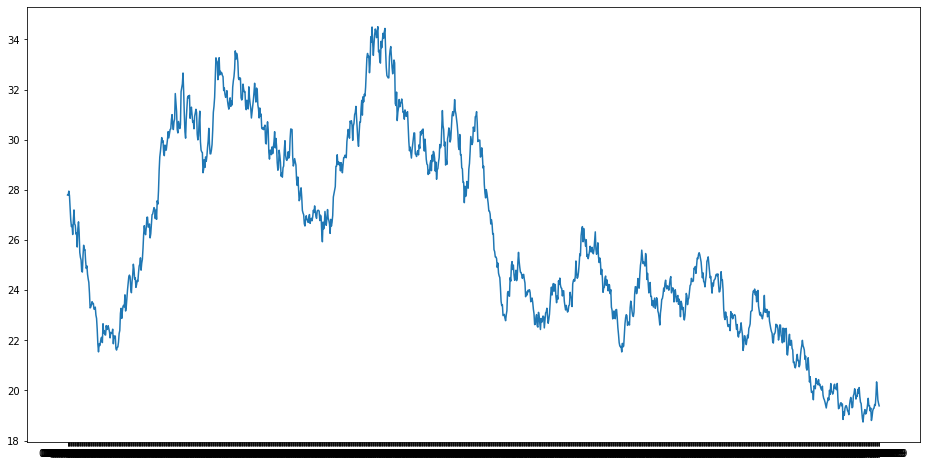

In [15]:
#setting index as date
#df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')


In [8]:
#importing required libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50,batch_size=32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





927/927 [==============================] - 8s 9ms/step - loss: 0.0792
Epoch 2/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0546
Epoch 3/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0536
Epoch 4/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0531
Epoch 5/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0526
Epoch 6/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0533
Epoch 7/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0524
Epoch 8/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0526
Epoch 9/50
927/927 [==============================] - 5s 6ms/step - loss: 0.0543
Epoch 10/50
927/927 [============================

In [0]:

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [11]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.967762479102894

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


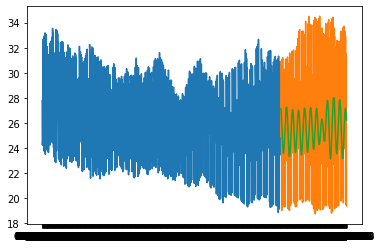

In [12]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [18]:
len(valid['Predictions'])

272

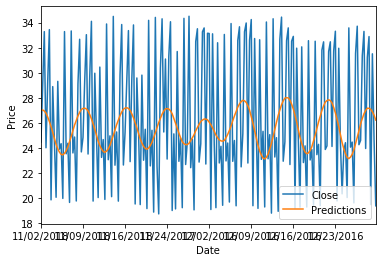

In [20]:
valid['Close'].tail(200).plot()
valid['Predictions'].tail(200).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

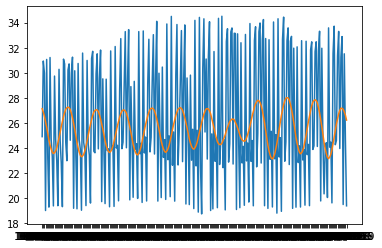

In [13]:
plt.plot(valid[['Close','Predictions']])